In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancerData = datasets.load_breast_cancer()

In [5]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )

In [7]:
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [22]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [23]:
print((X).dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
y = cancerData.target

In [9]:
X.shape

(569, 30)

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [11]:
X_train.shape

(512, 30)

In [12]:
y_test.shape

(57,)

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

In [16]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 16)            48        
                                                                 
 batch_normalization (BatchN  (None, 29, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 32)            0

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 10s 20ms/step - loss: 0.5951 - accuracy: 0.7168 - val_loss: 0.6483 - val_accuracy: 0.8772
Epoch 2/35
16/16 [==============================] - 0s 5ms/step - loss: 0.4155 - accuracy: 0.8125 - val_loss: 0.6204 - val_accuracy: 0.8772
Epoch 3/35
16/16 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8789 - val_loss: 0.5911 - val_accuracy: 0.8596
Epoch 4/35
16/16 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.9082 - val_loss: 0.5606 - val_accuracy: 0.8772
Epoch 5/35
16/16 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9180 - val_loss: 0.5293 - val_accuracy: 0.8772
Epoch 6/35
16/16 [==============================] - 0s 5ms/step - loss: 0.2287 - accuracy: 0.9180 - val_loss: 0.4969 - val_accuracy: 0.8772
Epoch 7/35
16/16 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 0.9180 - val_loss: 0.4644 - val_accuracy: 0.8772
Epoch 8/35
16/16 [

In [36]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

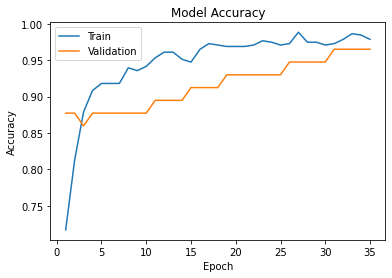

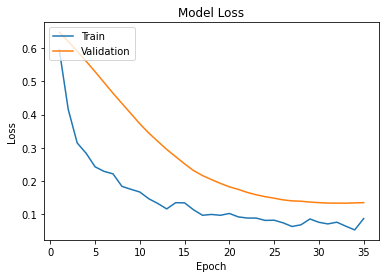

In [21]:
plotLearningCurve(history,35)

In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy*100, loss))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy*100, loss))
model.save("model.h5")

2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9649
Validation: accuracy = 96.491230  ;  loss_v = 0.000000
Test: accuracy = 96.491230  ;  loss = 0.000000
